<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/project/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치,import, 데이터 준비



In [1]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00


In [2]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=057a3b0180cf0a4c0ab755f0845352cd934e7f59cb6c48d1296528ef93c71ba3
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [3]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=a22b25dde71d3bafaba950e5b2e52e603ebc8dacbf7c9f670e0788c94f58bad6
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')

import re
from nltk.tokenize import word_tokenize
import wordcloud
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences #keras_preprocessing

from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

import os 
import warnings
warnings.filterwarnings(action  = 'ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from autocorrect import Speller 

In [6]:
#%config Completer.use_jedi = False

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_train = pd.read_csv('drive/MyDrive/nlp-getting-started/train.csv')
df_test = pd.read_csv('drive/MyDrive//nlp-getting-started/test.csv')
df_sample = pd.read_csv('drive/MyDrive//nlp-getting-started/sample_submission.csv')

In [9]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
df_train.shape

(7613, 5)

In [11]:
df_test.shape

(3263, 4)

In [12]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# EDA

In [ ]:
def create_corpus(target):
    corpus = []
    for x in df_train[df_train["target"] == target]["text"].str.split():
        print(x)
        for i in x:
            corpus.append(i)
            
    return corpus

In [ ]:
corpus = create_corpus(0)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1
        
top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

Text(0.5, 1.0, 'top words 0')

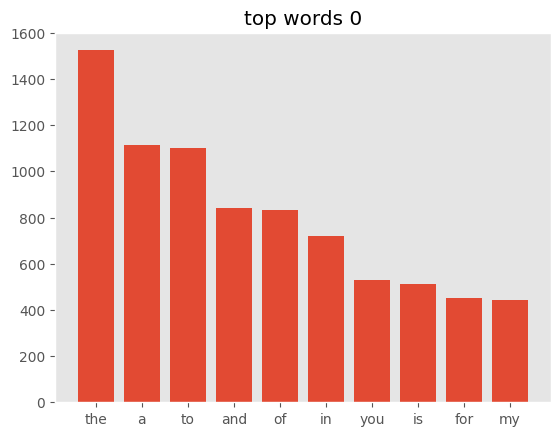

In [ ]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y)
plt.title("top words 0")

In [ ]:
corpus = create_corpus(1)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1
        
top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

Text(0.5, 1.0, 'top words 1')

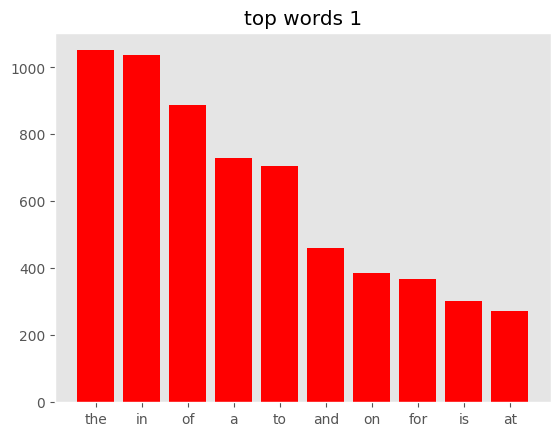

In [ ]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("top words 1")

In [ ]:
corpus = create_corpus(1)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1

Text(0.5, 1.0, 'Punctuation disaster 1')

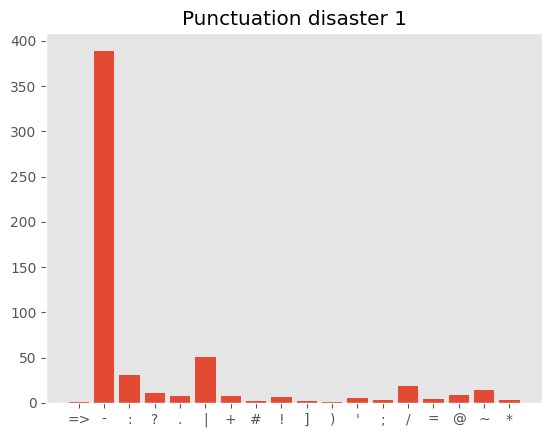

In [ ]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y)
plt.title("Punctuation disaster 1")

In [ ]:
corpus = create_corpus(0)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1

Text(0.5, 1.0, 'Punctuation disaster 0')

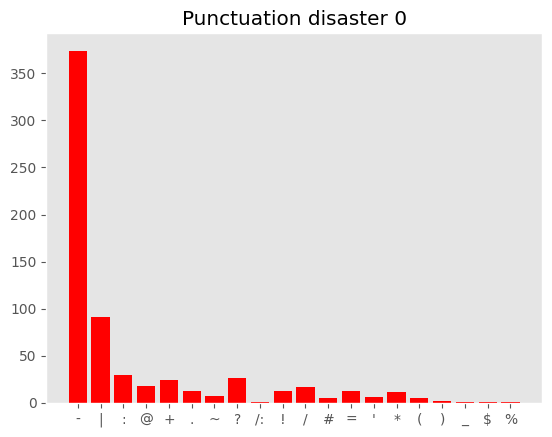

In [ ]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("Punctuation disaster 0")

In [ ]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

<Axes: title={'center': 'most common words'}>

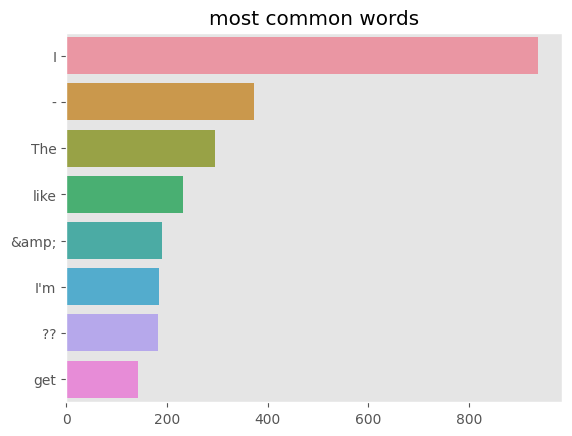

In [ ]:
plt.title("most common words")
plt.grid()
sns.barplot(x = y, y = x)

# 데이터 전처리

In [14]:
import emoji
stop=set(stopwords.words('english'))

def text_preproccessing(df):  
    
    df = df.copy()
    
    def remove_URL(text):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'',text)

    def remove_html(text):
        html=re.compile(r'<.*?>')
        return html.sub(r'',text)

    def remove_punct(text):
        table=str.maketrans('','',string.punctuation)
        return text.translate(table)

    # Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_stopwords(x):
        return ' '.join([i for i in x.split() if i not in stop])

    def spell_check(x):
        spell = Speller(lang='en')
        return " ".join([spell(i) for i in x.split()])

    df['text']=df['text'].apply(lambda x : remove_URL(x))
    df['text']=df['text'].apply(lambda x : remove_html(x))
    df['text']=df['text'].apply(lambda x : remove_punct(x))
    df['text']=df['text'].apply(lambda x : remove_emoji(x))
    df['text']=df['text'].apply(lambda x : remove_stopwords(x))
    #df['text']=df['text'].apply(lambda x : spell_check(x))

    return df


In [15]:
df_train = text_preproccessing(df_train)
df_test = text_preproccessing(df_test)

In [16]:
df_train.shape

(7613, 5)

In [17]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked shelter place notified off...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent photo Ruby Alaska smoke wildfire...,1


In [18]:
df_test.shape

(3263, 4)

In [19]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened terrible car crash
1,2,NaN,NaN,Heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 China Taiwan


In [20]:
df=pd.concat([df_train,df_test])
df.shape

(10876, 5)

#  simple RNN

In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X_train_encoded = tokenizer.texts_to_sequences(df['text']) #단어를 숫자로

print(X_train_encoded[:5])

[[642, 5761, 761, 182, 82, 1873, 3684, 16], [97, 7, 144, 762, 8487, 8488, 1354], [123, 1522, 1434, 2187, 665, 8489, 1729, 79, 210, 2187, 665, 1615, 1179], [3121, 12, 4452, 1222, 210, 1615, 41], [141, 38, 1435, 231, 5762, 2432, 218, 1222, 8490, 142]]


In [68]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'the': 2, 'like': 3, 'amp': 4, 'im': 5, 'a': 6, 'fire': 7, 'get': 8, 'new': 9, 'via': 10, 'news': 11, 'people': 12, 'one': 13, 'in': 14, 'dont': 15, 'us': 16, '2': 17, 'emergency': 18, 'video': 19, 'disaster': 20, 'would': 21, 'this': 22, 'to': 23, 'police': 24, 'still': 25, 'is': 26, 'you': 27, 'my': 28, 'suicide': 29, 'body': 30, 'crash': 31, 'burning': 32, 'first': 33, 'storm': 34, 'rt': 35, 'attack': 36, 'time': 37, 'got': 38, 'back': 39, 'know': 40, 'california': 41, 'fires': 42, 'buildings': 43, 'see': 44, 'going': 45, 'and': 46, '3': 47, 'man': 48, 'day': 49, 'love': 50, 'two': 51, 'world': 52, 'cant': 53, 'bomb': 54, 'if': 55, 'nuclear': 56, 'full': 57, 'go': 58, 'hiroshima': 59, 'dead': 60, 'youtube': 61, 'watch': 62, 'today': 63, 'life': 64, 'think': 65, 'car': 66, 'train': 67, 'last': 68, 'killed': 69, 'it': 70, 'accident': 71, 'its': 72, 'good': 73, 'of': 74, 'say': 75, 'we': 76, 'make': 77, 'war': 78, 'no': 79, 'how': 80, 'could': 81, 'may': 82, 'many': 83, 'more'

In [69]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 1인 것들 개수 카운트
total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 1인 것들의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 14308
단어 집합(vocabulary)에서 희귀 단어의 비율: 62.77090462402387
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.831596506017615


In [70]:
a = []
for i in range(len(X_train_encoded)):
    a.append(len(X_train_encoded[i]))
max(a)

#가장 긴 tweet의 길이 : 28개의 단어

28

In [ ]:
tokenizer.word_counts.items()
#등장 빈도가 1번인 애들 살펴보기

In [72]:
total_cnt - rare_cnt + 1

8487

# RNN 한번만 나오는 단어 제거

In [74]:
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)    #한번만 나오는 단어 제거, 단어 빈도가 많은 순서로 5767개 단어 보존
tokenizer.fit_on_texts(df['text'])                             #key value로 이루어진 딕셔너리 만들기    
X_train_encoded = tokenizer.texts_to_sequences(df['text'])     #단어를 숫자로

print(X_train_encoded[:5])

[[642, 5761, 761, 182, 82, 1873, 3684, 16], [97, 7, 144, 762, 1354], [123, 1522, 1434, 2187, 665, 1729, 79, 210, 2187, 665, 1615, 1179], [3121, 12, 4452, 1222, 210, 1615, 41], [141, 38, 1435, 231, 5762, 2432, 218, 1222, 142]]


In [75]:
a = []
for i in range(len(X_train_encoded)):
    a.append(len(X_train_encoded[i]))
max(a)

#등장 빈도 1번인 애들 제거 후 가장 긴 tweet의 길이 : 26개의 단어

26

In [76]:
max_len = 26
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)     # padding
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (10876, 26)


In [77]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8487


In [80]:
train_data, val_data, train_labels, val_labels = train_test_split(X_train_padded[:df_train.shape[0]], df_train['target'].values, test_size=0.2, random_state=0, stratify=df_train['target'].values)
#stratify=df_train['target'].values -> train, test에서 0,1의 비율이 똑같

In [81]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',                    
        patience=5                                 
    ),
    tf.keras.callbacks.ModelCheckpoint(                
        filepath="checkpoint_path.keras",        
        monitor='val_accuracy',                          
        save_best_only=True,                       
        verbose=1                                   
    )
]


history = model.fit(train_data, train_labels, 
                    validation_data = [val_data, val_labels], 
                    epochs=50,                           #그래프 보면서 에포크 늘려봤음 
                    batch_size=64, 
                    callbacks = callbacks_list, validation_split=0.2)

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5394
Epoch 1: val_accuracy improved from -inf to 0.53775, saving model to checkpoint_path.keras
96/96 [==============================] - 19s 171ms/step - loss: 0.6905 - accuracy: 0.5394 - val_loss: 0.6904 - val_accuracy: 0.5378
Epoch 2/50
96/96 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5663
Epoch 2: val_accuracy improved from 0.53775 to 0.55023, saving model to checkpoint_path.keras
96/96 [==============================] - 9s 98ms/step - loss: 0.6862 - accuracy: 0.5663 - val_loss: 0.6874 - val_accuracy: 0.5502
Epoch 3/50
96/96 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5732
Epoch 3: val_accuracy improved from 0.55023 to 0.55548, saving model to checkpoint_path.keras
96/96 [==============================] - 5s 51ms/step - loss: 0.6831 - accuracy: 0.5732 - val_loss: 0.6853 - val_accuracy: 0.5555
Epoch 4/50
96/96 [=============================

In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

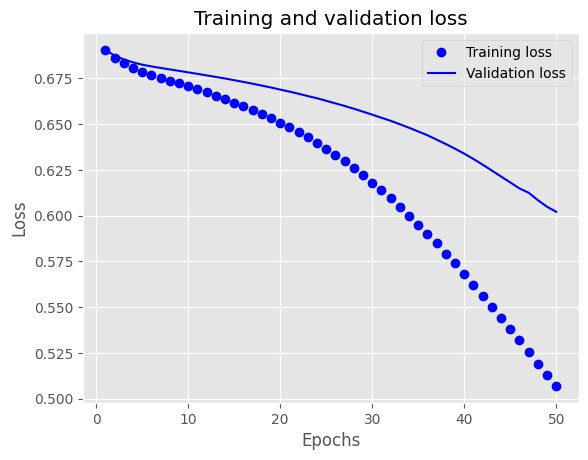

In [84]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

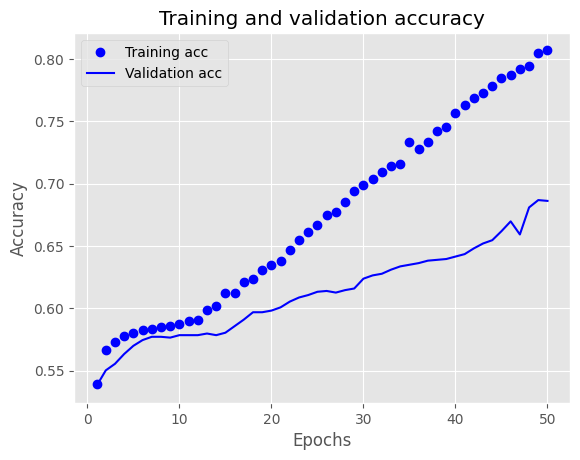

In [85]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
loaded_model = tf.keras.models.load_model('checkpoint_path.keras')
predicted = loaded_model.predict(X_train_padded[df_train.shape[0]:])
y_predicted = np.where(predicted>0.5,1,0)
y_predicted = y_predicted.reshape((1,3263))[0]
df_sample['id'] = df_test.id
df_sample['target'] = y_predicted
df_sample.to_csv('submission.csv',index = False)
#리더보드 결과 : 0.69169

102/102 [==============================] - 1s 5ms/step


#RNN 한번만 나오는 단어 제거 X

In [88]:
tokenizer = Tokenizer()                                        #한번만 나오는 단어 제거X
tokenizer.fit_on_texts(df['text'])                             #key value로 이루어진 딕셔너리 만들기    
X_train_encoded = tokenizer.texts_to_sequences(df['text'])     #단어를 숫자로

print(X_train_encoded[:5])

[[642, 5761, 761, 182, 82, 1873, 3684, 16], [97, 7, 144, 762, 8487, 8488, 1354], [123, 1522, 1434, 2187, 665, 8489, 1729, 79, 210, 2187, 665, 1615, 1179], [3121, 12, 4452, 1222, 210, 1615, 41], [141, 38, 1435, 231, 5762, 2432, 218, 1222, 8490, 142]]


In [89]:
a = []
for i in range(len(X_train_encoded)):
    a.append(len(X_train_encoded[i]))
max(a)

#등장 빈도 1번인 애들 제거 후 가장 긴 tweet의 길이 : 28개의 단어

28

In [90]:
max_len = 28
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)     # padding
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (10876, 28)


In [92]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 22795


In [93]:
train_data, val_data, train_labels, val_labels = train_test_split(X_train_padded[:df_train.shape[0]], df_train['target'].values, test_size=0.2, random_state=0, stratify=df_train['target'].values)
#stratify=df_train['target'].values -> train, test에서 0,1의 비율이 똑같

In [94]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',                    
        patience=5                                 
    ),
    tf.keras.callbacks.ModelCheckpoint(                
        filepath="checkpoint_path.keras",        
        monitor='val_accuracy',                          
        save_best_only=True,                       
        verbose=1                                   
    )
]


history = model.fit(train_data, train_labels, 
                    validation_data = [val_data, val_labels], 
                    epochs=50,                           #그래프 보면서 에포크 늘려봤음 
                    batch_size=64, 
                    callbacks = callbacks_list, validation_split=0.2)

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5545
Epoch 1: val_accuracy improved from -inf to 0.57124, saving model to checkpoint_path.keras
96/96 [==============================] - 20s 183ms/step - loss: 0.6878 - accuracy: 0.5545 - val_loss: 0.6812 - val_accuracy: 0.5712
Epoch 2/50
96/96 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.5714
Epoch 2: val_accuracy did not improve from 0.57124
96/96 [==============================] - 11s 112ms/step - loss: 0.6826 - accuracy: 0.5714 - val_loss: 0.6781 - val_accuracy: 0.5673
Epoch 3/50
96/96 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.5750
Epoch 3: val_accuracy did not improve from 0.57124
96/96 [==============================] - 7s 68ms/step - loss: 0.6791 - accuracy: 0.5750 - val_loss: 0.6764 - val_accuracy: 0.5673
Epoch 4/50
96/96 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.5791
Epoch 4: val_accuracy improved from 0

In [95]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

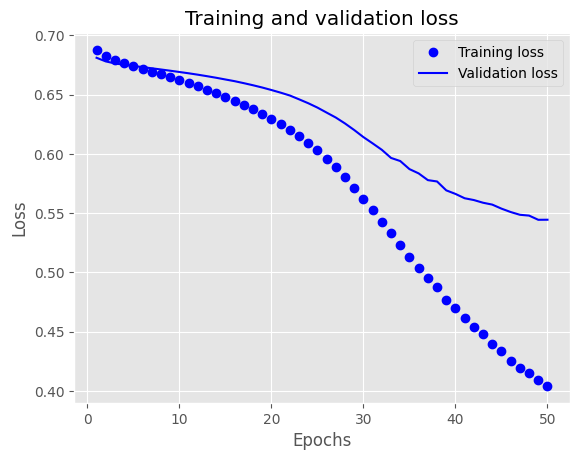

In [96]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

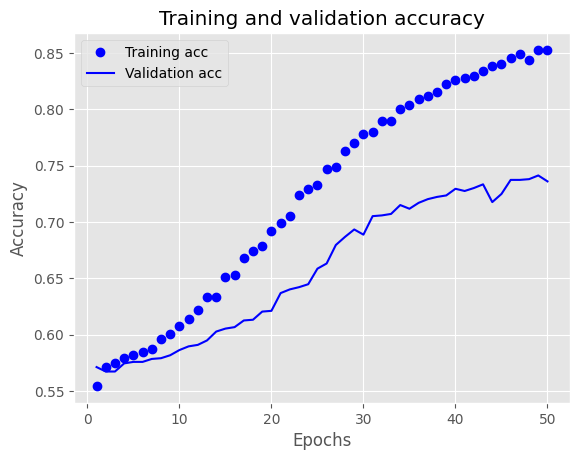

In [97]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [98]:
loaded_model = tf.keras.models.load_model('checkpoint_path.keras')
predicted = loaded_model.predict(X_train_padded[df_train.shape[0]:])
y_predicted = np.where(predicted>0.5,1,0)
y_predicted = y_predicted.reshape((1,3263))[0]
df_sample['id'] = df_test.id
df_sample['target'] = y_predicted
df_sample.to_csv('submission.csv',index = False)
#리더보드 결과 : 0.71437

102/102 [==============================] - 1s 4ms/step


# LSTM

# GLOVE

In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [ ]:
corpus=create_corpus(df)

 73%|███████▎  | 7933/10876 [00:00<00:00, 9413.91it/s]


KeyboardInterrupt: ignored

In [ ]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

#pre-trained word embedding download
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [ ]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    #100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

In [ ]:
embedding_dict['described']
#임의의 단어의 임베딩 벡터

In [ ]:
print('벡터의 차원 수 :',len(embedding_dict['described']))

In [ ]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [ ]:
tweet_pad

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

In [ ]:
num_words=len(word_index)

In [ ]:
embedding_matrix = np.zeros((num_words, 100))

In [ ]:
len(word_index.items())

In [ ]:
for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

In [ ]:
embedding_matrix.shape

In [ ]:
tweet_pad[0][0:]

In [ ]:
model=Sequential()

output_dim = 100
embedding=Embedding(num_words,output_dim,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

optimzer=Adam(learning_rate=1e-5)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',                    
        patience=5                                 
    ),
    tf.keras.callbacks.ModelCheckpoint(                
        filepath="checkpoint_path.keras",        
        monitor='val_accuracy',                          
        save_best_only=True,                       
        verbose=1                                   
    )
]

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(tweet_pad[:df_train.shape[0]], df_train['target'].values, test_size=0.15, random_state=10)

print('Shape of train',train_data.shape)
print("Shape of Validation ",val_data.shape)

In [ ]:
train_history = model.fit(
    train_data, train_labels,
    validation_data = (val_data, val_labels),
    callbacks=callbacks_list,
    #validation_split = 0.1,
    epochs=30,
    batch_size=4
)

In [ ]:
loaded_model = tf.keras.models.load_model('checkpoint_path.keras')
predicted = loaded_model.predict(tweet_pad[df_train.shape[0]:])
y_predicted = np.where(predicted>0.5,1,0)
y_predicted = y_predicted.reshape((1,3263))[0]
df_sample['id'] = df_test.id
df_sample['target'] = y_predicted
df_sample.to_csv('submission.csv',index = False)
#리더보드 결과 : 0.79098

# ELMO

In [20]:
pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import tensorflow_hub as hub
from keras import backend as K
from keras.models import Model
from keras.layers import Dense, Lambda, Input

In [48]:
elmo = hub.load("https://tfhub.dev/google/elmo/2")
# 텐서플로우 허브로부터 ELMo를 다운로드

In [49]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]

In [50]:
input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: ignored

# BERT

In [ ]:
max_length = max([len(sent.split()) for sent in df_train.text ])
print(max_length)

31


In [ ]:
max_length = max([len(sent.split()) for sent in df_test.text ])
print(max_length)

31


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(df_train.text.values, df_train.target.values, test_size=0.2, random_state=10)

In [ ]:
train_data = tokenizer(
text = train_data.tolist(),
    add_special_tokens = True,
    max_length = 34,
    truncation = True,
    padding = True,
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
    
)

In [ ]:
train_data

{'input_ids': <tf.Tensor: shape=(6090, 34), dtype=int32, numpy=
array([[  101,  5796,  4328, ...,     0,     0,     0],
       [  101,  8026, 14887, ...,     0,     0,     0],
       [  101,  3963,  2086, ...,     0,     0,     0],
       ...,
       [  101,  5043,  2007, ...,     0,     0,     0],
       [  101,  2663,  5622, ...,     0,     0,     0],
       [  101,  5506,  2314, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(6090, 34), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
val_data = tokenizer(
text = val_data.tolist(),
    add_special_tokens = True,
    max_length = 34,
    truncation = True,
    padding = True,
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
    
)

##Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [ ]:
max_len = 34


input_ids = keras.Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = keras.Input(shape = (max_len,), dtype = tf.int32, name = 'input_mask')

embeddings = bert([input_ids, input_mask])[1]

out = tf.keras.layers.Dropout(0.1)(embeddings)

out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [ ]:
model.summary()

In [ ]:
train_data['input_ids']

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(
    learning_rate=6e-06, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy')


model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',                    
        patience=2                                 
    ),
    tf.keras.callbacks.ModelCheckpoint(                
        filepath="checkpoint_path.keras",        
        monitor='val_accuracy',                          
        save_best_only=True,                       
        verbose=1                                   
    )
]

In [ ]:
train_history = model.fit(
    x ={'input_ids':train_data['input_ids'],'input_mask':train_data['attention_mask']} ,
    y = train_labels,
    validation_data = ({'input_ids':val_data['input_ids'],'input_mask':val_data['attention_mask']},val_labels),
    callbacks=callbacks_list,
    #validation_split = 0.1,
    epochs=20,
    batch_size=10
)

IndexError: ignored

In [ ]:
loaded_model = tf.keras.models.load_model('checkpoint_path.keras', custom_objects={"TFBertModel": TFBertModel})

In [ ]:
x_test = tokenizer(
    text=df_test.text.tolist(),
    add_special_tokens=True,
    max_length=34,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
x_test['attention_mask']

In [ ]:
predicted = loaded_model.predict({'input_ids':x_test['input_ids'],'input_mask':x_test['attention_mask']})

In [ ]:
y_predicted = np.where(predicted>0.5,1,0)
y_predicted = y_predicted.reshape((1,3263))[0]
df_sample['id'] = df_test.id
df_sample['target'] = y_predicted
df_sample.to_csv('submission.csv',index = False)
# 리더보드 0.82929

# BERTweet